<a href="https://colab.research.google.com/github/pemba007/final-exam/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1047]:
# # Installing required libraries
# !pip install fuzzy-c-means
# !pip install hmmlearn
# !pip install ReliefF

In [1048]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [1049]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [1050]:
# Reading all the datasets
df_3 = pd.read_csv('QCM3.csv')
df_6 = pd.read_csv('QCM6.csv')
df_7 = pd.read_csv('QCM7.csv')
df_10 = pd.read_csv('QCM10.csv')
df_12 = pd.read_csv('QCM12.csv')

In [1051]:
# Libraries for preprocessing
from sklearn.preprocessing import Normalizer

# Library for model selection
from sklearn.model_selection import train_test_split

# Library for MLP, SVM, hmmlearn, K means and FCMeans
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from hmmlearn.hmm import GaussianHMM
from sklearn.cluster import KMeans
from fcmeans import FCM

# Library for metrics
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix

In [1052]:
# Metrics calculation
def metricCalculation(y_test, y_pred):
  cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

  res = []

  for l in range(5):
      x = cm[l]
      tn, fp = x[0]
      fn, tp = x[1]
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      precision = tp / (tp + fp)
      f1 = (2 * precision * sensitivity) / (precision + sensitivity)
      res.append([l+1,sensitivity, specificity, f1])

  performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

  performance['F1 score'] = performance['F1 score'].fillna(0)
  performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
  performance['Specificity'] = performance['Specificity'].fillna(0)

  total_accuracy = accuracy_score(y_test, y_pred)
  print("The total accuracy is", total_accuracy)
  print(performance)

# Using QCM3 sensor data for classification

In [1053]:
# Separating features and target variable
y = df_3['Class']
X = df_3.drop(columns = ['Class'])

## Preprocessing

In [1054]:
X = Normalizer().fit_transform(X)

In [1055]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

## Implementing MLP

In [1056]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for MLP

In [1057]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.8


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.00,1.000000
1,2,1.0,0.75,0.666667
2,3,0.0,1.00,0.000000
3,4,1.0,1.00,1.000000
4,5,1.0,1.00,1.000000


## Implementing SVC

In [1058]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for SVC

In [1059]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# hmm remain

# Implementing clustering algorithms

In [1060]:
y = y.to_numpy()

# Implementing K means

In [1061]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X)
y_pred = kmeans.predict(X)

In [1062]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for KMeans

In [1063]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Implementing FCMeans

In [1064]:
from fcmeans import FCM
fcm = FCM(n_clusters = 5)
fcm.fit(X)
y_pred = fcm.predict(X)

In [1065]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for FCMeans

In [1066]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Using QCM6 sensor data for classification

In [1067]:
# Separating features and target variable
y = df_6['Class']
X = df_6.drop(columns = ['Class'])

## Preprocessing

In [1068]:
X = Normalizer().fit_transform(X)

In [1069]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

## Implementing MLP

In [1070]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for MLP

In [1071]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))
for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,1,1.0,1.0,1.0
6,2,1.0,1.0,1.0
7,3,1.0,1.0,1.0
8,4,1.0,1.0,1.0
9,5,1.0,1.0,1.0


## Implementing SVC

In [1072]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for SVC

In [1073]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# hmm remain

# Implementing clustering algorithms

In [1074]:
y = y.to_numpy()

# Implementing K means

In [1075]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X)
y_pred = kmeans.predict(X)

In [1076]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for KMeans

In [1077]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Implementing FCMeans

In [1078]:
from fcmeans import FCM
fcm = FCM(n_clusters = 5)
fcm.fit(X)
y_pred = fcm.predict(X)

In [1079]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for FCMeans

In [1080]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Using QCM7 sensor data for classification

In [1081]:
# Separating features and target variable
y = df_7['Class']
data = df_7.drop(columns = ['Class'])

## Preprocessing

In [1082]:
X = Normalizer().fit_transform(data)

In [1083]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

## Implementing MLP

In [1084]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for MLP

In [1085]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.8


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.00,1.000000
1,2,0.0,1.00,0.000000
2,3,1.0,1.00,1.000000
3,4,1.0,0.75,0.666667
4,5,1.0,1.00,1.000000


## Implementing SVC

In [1086]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for SVC

In [1087]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Implementing HMM Learn

In [1088]:
# Retriving values for each classes
X_1, y_1 = X[0:5], y[0:5]
X_2, y_2 = X[5:10], y[5:10]
X_3, y_3 = X[10:15], y[10:15]
X_4, y_4 = X[15:20], y[15:20]
X_5, y_5 = X[20:25], y[20:25]

In [1089]:
X_1

array([[-0.11214742, -0.14190693, -0.18684579, -0.22619226, -0.27282881,
        -0.32345993, -0.35232066, -0.40664675, -0.40574798, -0.49802244],
       [-0.11250151, -0.1396321 , -0.19108979, -0.23088132, -0.27537549,
        -0.32755666, -0.33325408, -0.40795364, -0.41057626, -0.49884111],
       [-0.11296287, -0.13736285, -0.19717155, -0.23241597, -0.27858697,
        -0.32820848, -0.33650612, -0.40609124, -0.41003468, -0.49383259],
       [-0.11503078, -0.13742548, -0.20193443, -0.23426534, -0.2794369 ,
        -0.32865937, -0.33485039, -0.4030281 , -0.41189426, -0.49184257],
       [-0.11981503, -0.13735244, -0.20620835, -0.23416758, -0.28476733,
        -0.32832336, -0.33896081, -0.39998238, -0.41112295, -0.48644758]])

In [1090]:
# Splitting data for each class
x_trainc1, x_testc1, y_trainc1, y_testc1 = train_test_split(X_1, y_1, test_size=0.2)

x_trainc2, x_testc2, y_trainc2, y_testc2 = train_test_split(X_2, y_2, test_size=0.2)
x_trainc3, x_testc3, y_trainc3, y_testc3 = train_test_split(X_3, y_3, test_size=0.2)
x_trainc4, x_testc4, y_trainc4, y_testc4 = train_test_split(X_4, y_4, test_size=0.2)
x_trainc5, x_testc5, y_trainc5, y_testc5 = train_test_split(X_5, y_5, test_size=0.2)

In [1091]:
model1 = GaussianHMM(n_components=2, algorithm="viterbi", covariance_type = "diag", n_iter = 30).fit(x_trainc1)
model2 = GaussianHMM(n_components=2, algorithm="viterbi", covariance_type = "diag", n_iter = 30).fit(x_trainc2)
model3 = GaussianHMM(n_components=2, algorithm="viterbi", covariance_type = "diag", n_iter = 30).fit(x_trainc3)
model4 = GaussianHMM(n_components=2, algorithm="viterbi", covariance_type = "diag", n_iter = 30).fit(x_trainc4)
model5 = GaussianHMM(n_components=2, algorithm="viterbi", covariance_type = "diag", n_iter = 30).fit(x_trainc5)

Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.


In [1092]:
x_test = [x_testc1, x_testc2,x_testc3,x_testc5]

In [1093]:
pred_prob1 = model1.predict_proba(X_test);
pred_prob2 = model2.predict_proba(X_test);
pred_prob3 = model1.predict_proba(X_test);
pred_prob4 = model2.predict_proba(X_test);
pred_prob5 = model1.predict_proba(X_test);

In [1094]:
pred_prob1

array([[0.51086229, 0.48913771],
       [0.4963316 , 0.5036684 ],
       [0.49596356, 0.50403644],
       [0.49604086, 0.50395914],
       [0.49619824, 0.50380176]])

# Implementing clustering algorithms

In [1095]:
y = y.to_numpy()

# Implementing K means

In [1096]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X)
y_pred = kmeans.predict(X)

In [1097]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for KMeans

In [1098]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Implementing FCMeans

In [1099]:
from fcmeans import FCM
fcm = FCM(n_clusters = 5)
fcm.fit(X)
y_pred = fcm.predict(X)

In [1100]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for FCMeans

In [1101]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Using QCM10 sensor data for classification

In [1102]:
# Separating features and target variable
y = df_10['Class']
X = df_10.drop(columns = ['Class'])

## Preprocessing

In [1103]:
X = Normalizer().fit_transform(X)

In [1104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

## Implementing MLP

In [1105]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for MLP

In [1106]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.8


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.00,1.000000
1,2,0.0,1.00,0.000000
2,3,1.0,1.00,1.000000
3,4,1.0,0.75,0.666667
4,5,1.0,1.00,1.000000


## Implementing SVC

In [1107]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for SVC

In [1108]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# hmm remain

# Implementing clustering algorithms

In [1109]:
y = y.to_numpy()

# Implementing K means

In [1110]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X)
y_pred = kmeans.predict(X)

In [1111]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for KMeans

In [1112]:
metricCalculation(y, y_pred)

The total accuracy is 1.0
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  1.0          1.0       1.0
1      2                  1.0          1.0       1.0
2      3                  1.0          1.0       1.0
3      4                  1.0          1.0       1.0
4      5                  1.0          1.0       1.0


# Implementing FCMeans

In [1113]:
from fcmeans import FCM
fcm = FCM(n_clusters = 5)
fcm.fit(X)
y_pred = fcm.predict(X)

In [1114]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for FCMeans

In [1115]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 1.0


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0


# Using QCM12 sensor data for classification

In [1116]:
# Separating features and target variable
y = df_12['Class']
X = df_12.drop(columns = ['Class'])

## Preprocessing

In [1117]:
X = Normalizer().fit_transform(X)

In [1118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

## Implementing MLP

In [1119]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for MLP

In [1120]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.6


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.0,1.00,0.000000
1,2,1.0,1.00,1.000000
2,3,0.0,0.75,0.000000
3,4,1.0,1.00,1.000000
4,5,1.0,0.75,0.666667


## Implementing SVC

In [1121]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Metrics for SVC

In [1122]:
cm = multilabel_confusion_matrix(y_test, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y_test, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.8


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.0,1.00,0.000000
1,2,1.0,1.00,1.000000
2,3,1.0,0.75,0.666667
3,4,1.0,1.00,1.000000
4,5,1.0,1.00,1.000000


# hmm remain

# Implementing clustering algorithms

In [1123]:
y = y.to_numpy()

# Implementing K means

In [1124]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X)
y_pred = kmeans.predict(X)

In [1125]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for KMeans

In [1126]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.88


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.4,1.00,0.571429
1,2,1.0,1.00,1.000000
2,3,1.0,0.85,0.769231
3,4,1.0,1.00,1.000000
4,5,1.0,1.00,1.000000


# Implementing FCMeans

In [1127]:
from fcmeans import FCM
fcm = FCM(n_clusters = 5)
fcm.fit(X)
y_pred = fcm.predict(X)

In [1128]:
df = pd.DataFrame(y_pred, columns=['Class'])
y_pred = df.replace({y_pred[0]: y[0], y_pred[6]: y[6], y_pred[11]: y[11], y_pred[16]: y[16],y_pred[21]: y[21]}).to_numpy()

### Metrics for FCMeans

In [1129]:
cm = multilabel_confusion_matrix(y, y_pred, labels= range(5))

res = []

for l in range(5):
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

performance = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

performance['F1 score'] = performance['F1 score'].fillna(0)
performance['Sensitivity(Recall)'] = performance['Sensitivity(Recall)'].fillna(0)
performance['Specificity'] = performance['Specificity'].fillna(0)

total_accuracy = accuracy_score(y, y_pred)
print("The total accuracy is", total_accuracy)
performance

The total accuracy is 0.88


,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.4,1.00,0.571429
1,2,1.0,1.00,1.000000
2,3,1.0,0.85,0.769231
3,4,1.0,1.00,1.000000
4,5,1.0,1.00,1.000000


# Part 2: Combining all dataset

In [1130]:
# We have datasets in df_3, df_6, df_7, df_10 and df_12
df_3.iloc[:, : -1].columns

Index(['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1',
       '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1',
       '0.400_0.600', '0.400_0.600.1'],
      dtype='object')

In [1131]:
df = pd.concat([df_3.iloc[:, : -1], df_6.iloc[:, : -1], df_7.iloc[:, : -1], df_10.iloc[:, : -1], df_12], axis = 1)

In [1132]:
df.shape

(25, 51)

In [1133]:
# Outputting the dataframe to run in matlab
from pathlib import Path  
filepath = Path('./out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [1134]:
# Separating X and training value
X = df.iloc[:, :-1]
y = df['Class']

# Implementing the Minimum Redundancy Maximum Relevance on Matlab, we set the indexes variable to the rank after implementing MRMR

In [1135]:
mrmr_indexes = [4,49,41,30,45,2,23,20,1,34,43,46,14,32,42,
          29,12,24,36,21,47,48,22,
           6, 5,28,33,50,31,15,27,3,35,44,11,13,18,19,
           9,17,39,16,8,40,10,25,7,37,38,26]
# It is 1-based indexing

In [1136]:
# Converting to 0 based indexing
mrmr_indexes[:] = [index - 1 for index in mrmr_indexes]

In [1137]:
# Get featurse from indexes
def get_features(all_features, indexes):
  df = pd.DataFrame()
  for x in indexes:
    df = pd.concat([df, all_features.iloc[:,x]], axis = 1)
  return df

In [1138]:
# Model for evaluating a classifier
def evaluate_classififer(classifier, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  return accuracy_score(y_test, y_pred), y_test, y_pred

In [1139]:
# Evaluate Kmeans classifier
def evaluate_kmeans(X,y):
  y = y.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  kmeans = KMeans(n_clusters = 5, random_state=0).fit(X_train)
  y_pred_train = kmeans.predict(X_train)
  y_pred = kmeans.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  # print("accuracy for kmeans", accuracy_score(y_test, y_pred))
  return accuracy_score(y_test, y_pred), y_test, y_pred

In [1140]:
# Evaluate FCMeans Classifier
def evaluate_fcmmeans(X,y):
  # print(X)
  y = y.to_numpy()
  X = X.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  fcm = FCM(n_clusters = 5)
  fcm.fit(X_train)
  y_pred_train = fcm.predict(X_train)
  y_pred = fcm.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  return accuracy_score(y_test, y_pred), y_test, y_pred

## Implementing feature selection with MRMR



In [1141]:
MLP_scores = list()
SVC_scores = list()
Kmeans_scores = list()
FCMeans_scores = list()

MLP_max = 0
MLP_max_test = 0
MLP_max_train = 0
SVM_max = 0
SVM_max_test = 0
SVM_max_train = 0
Kmeans_max = 0
Kmeans_max_test = 0
Kmeans_max_train = 0
FCMeans_max = 0
FCMeans_max_test = 0
FCMeans_max_train = 0

# Looping through number of features
for n_feature in range(1, X.shape[1]):
  # Getting features indexes
  features_indexes = mrmr_indexes[:n_feature]
  # Getting feature values
  features = get_features(X, features_indexes)

  # MLP
  mlp_acc, y_actual, y_pred = evaluate_classififer(MLPClassifier(), features, y)
  if mlp_acc > MLP_max:
    MLP_max_actual = y_actual
    MLP_max_pred = y_pred
  MLP_scores.append(mlp_acc)

  # SVC
  svc_acc, y_actual, y_pred = evaluate_classififer(SVC(), features, y)
  if svc_acc > SVM_max:
    SVM_max_actual = y_actual
    SVM_max_pred = y_pred
  SVC_scores.append(svc_acc)

  # K Means
  kmeans_acc, y_actual, y_pred = evaluate_kmeans(features, y)
  if kmeans_acc > Kmeans_max:
    Kmeans_max_actual = y_actual
    Kmeans_max_pred = y_pred
  Kmeans_scores.append(kmeans_acc)

  # FCMeans
  FCmeans_acc, y_actual, y_pred = evaluate_fcmmeans(features, y)
  if FCmeans_acc > FCMeans_max:
    FCMeans_max_actual = y_actual
    FCMeans_max_pred = y_pred
  FCMeans_scores.append(FCmeans_acc)

## Plotting the MLP accuracy graph

Best case for MLP Classifier
The total accuracy is 1.0
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  1.0          1.0       1.0
1      2                  1.0          1.0       1.0
2      3                  1.0          1.0       1.0
3      4                  1.0          1.0       1.0
4      5                  1.0          1.0       1.0


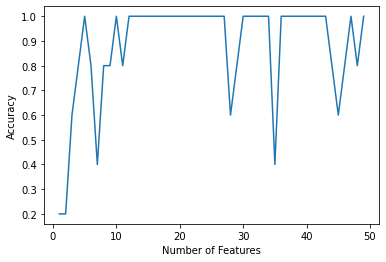

In [1142]:
p = sns.lineplot(x=range(1,50), y = MLP_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
print("Best case for MLP Classifier")
metricCalculation(MLP_max_actual, MLP_max_pred)

## Plotting the SVM accuracy graph

Best case for SVM Classifier
The total accuracy is 1.0
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  1.0          1.0       1.0
1      2                  1.0          1.0       1.0
2      3                  1.0          1.0       1.0
3      4                  1.0          1.0       1.0
4      5                  1.0          1.0       1.0


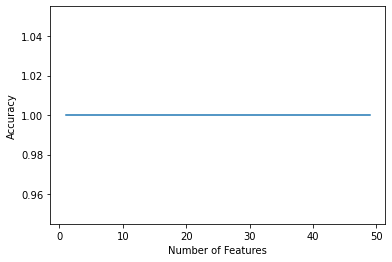

In [1143]:
p = sns.lineplot(x=range(1,50), y=SVC_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
print("Best case for SVM Classifier")
metricCalculation(SVM_max_actual, SVM_max_pred)

## Plotting the Kmeans accuracy graph

Best case for Kmeans Classifier
The total accuracy is 0.2
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  0.0         0.75       0.0
1      2                  0.0         0.75       0.0
2      3                  0.0         0.75       0.0
3      4                  0.0         0.75       0.0
4      5                  1.0         1.00       1.0


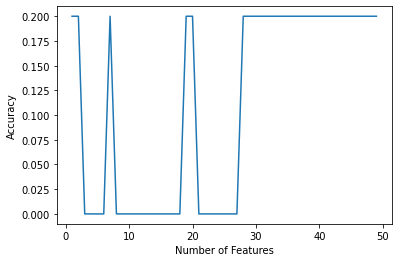

In [1144]:
p = sns.lineplot(x=range(1,50), y = Kmeans_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
print("Best case for Kmeans Classifier")
# metricCalculation(test.to_numpy(), pred)
metricCalculation(Kmeans_max_actual, Kmeans_max_pred)

## Plotting the FCMeans accuracy graph

Best case for FCMeans Classifier
The total accuracy is 0.2
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  1.0         1.00       1.0
1      2                  0.0         0.75       0.0
2      3                  0.0         0.75       0.0
3      4                  0.0         0.75       0.0
4      5                  0.0         0.75       0.0


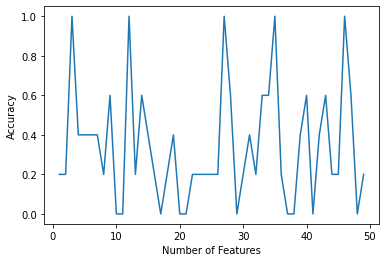

In [1145]:
p = sns.lineplot(x=range(1,50), y = FCMeans_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
# features_indexes = mrmr_indexes[:FCMeans_feature]
# test, pred = evaluate_fcmmeans_values(get_features(X, features_indexes), y)
print("Best case for FCMeans Classifier")
metricCalculation(FCMeans_max_actual, FCMeans_max_pred)
# metricCalculation(test, pred)

# Implementing Relief Feature Selection

In [1147]:
from ReliefF import ReliefF

MLP_scores = list()
SVC_scores = list()
Kmeans_scores = list()
FCMeans_scores = list()

MLP_max = 0
MLP_max_test = 0
MLP_max_train = 0
SVM_max = 0
SVM_max_test = 0
SVM_max_train = 0
Kmeans_max = 0
Kmeans_max_test = 0
Kmeans_max_train = 0
FCMeans_max = 0
FCMeans_max_test = 0
FCMeans_max_train = 0

# Looping through number of features
for n_feature in range(1, X.shape[1]):
  fs = ReliefF(n_neighbors = 5, n_features_to_keep = n_feature)
  features = fs.fit_transform(df.to_numpy(), y)

  # MLP
  mlp_acc, y_actual, y_pred = evaluate_classififer(MLPClassifier(), features, y)
  if mlp_acc > MLP_max:
    MLP_max_actual = y_actual
    MLP_max_pred = y_pred
  MLP_scores.append(mlp_acc)

  # SVC
  svc_acc, y_actual, y_pred = evaluate_classififer(SVC(), features, y)
  if svc_acc > SVM_max:
    SVM_max_actual = y_actual
    SVM_max_pred = y_pred
  SVC_scores.append(svc_acc)

  # K Means
  kmeans_acc, y_actual, y_pred = evaluate_kmeans(features, y)
  if kmeans_acc > Kmeans_max:
    Kmeans_max_actual = y_actual
    Kmeans_max_pred = y_pred
  Kmeans_scores.append(kmeans_acc)

  # FCMeans
  FCmeans_acc, y_actual, y_pred = evaluate_fcmmeans(pd.DataFrame(features), y)
  if FCmeans_acc > FCMeans_max:
    FCMeans_max_actual = y_actual
    FCMeans_max_pred = y_pred
  FCMeans_scores.append(FCmeans_acc)

## Plotting the MLP accuracy graph

Best case for MLP Classifier
The total accuracy is 1.0
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  1.0          1.0       1.0
1      2                  1.0          1.0       1.0
2      3                  1.0          1.0       1.0
3      4                  1.0          1.0       1.0
4      5                  1.0          1.0       1.0


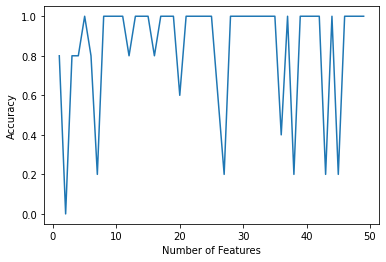

In [1148]:
p = sns.lineplot(x=range(1,50), y = MLP_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
print("Best case for MLP Classifier")
metricCalculation(MLP_max_actual, MLP_max_pred)

## Plotting the SVM accuracy graph

Best case for SVM Classifier
The total accuracy is 1.0
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  1.0          1.0       1.0
1      2                  1.0          1.0       1.0
2      3                  1.0          1.0       1.0
3      4                  1.0          1.0       1.0
4      5                  1.0          1.0       1.0


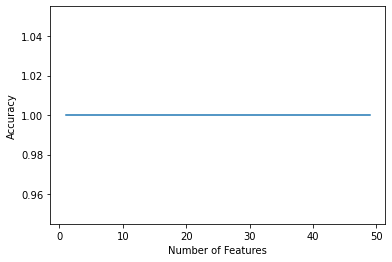

In [1149]:
p = sns.lineplot(x=range(1,50), y=SVC_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
print("Best case for SVM Classifier")
metricCalculation(SVM_max_actual, SVM_max_pred)

## Plotting the Kmeans accuracy graph

Best case for Kmeans Classifier
The total accuracy is 0.2
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  0.0         0.75       0.0
1      2                  0.0         0.75       0.0
2      3                  0.0         0.75       0.0
3      4                  0.0         0.75       0.0
4      5                  1.0         1.00       1.0


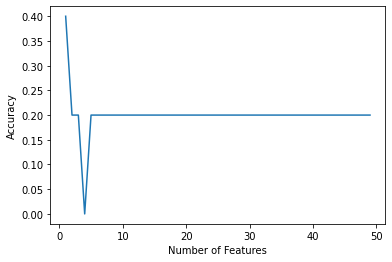

In [1150]:
p = sns.lineplot(x=range(1,50), y = Kmeans_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
print("Best case for Kmeans Classifier")
# metricCalculation(test.to_numpy(), pred)
metricCalculation(Kmeans_max_actual, Kmeans_max_pred)

## Plotting the FCMeans accuracy graph

Best case for FCMeans Classifier
The total accuracy is 0.6
   Class  Sensitivity(Recall)  Specificity  F1 score
0      1                  0.0         1.00  0.000000
1      2                  1.0         1.00  1.000000
2      3                  1.0         0.75  0.666667
3      4                  1.0         1.00  1.000000
4      5                  0.0         0.75  0.000000


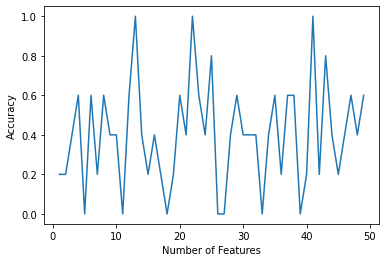

In [1151]:
p = sns.lineplot(x=range(1,50), y = FCMeans_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
# features_indexes = mrmr_indexes[:FCMeans_feature]
# test, pred = evaluate_fcmmeans_values(get_features(X, features_indexes), y)
print("Best case for FCMeans Classifier")
metricCalculation(FCMeans_max_actual, FCMeans_max_pred)
# metricCalculation(test, pred)